D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


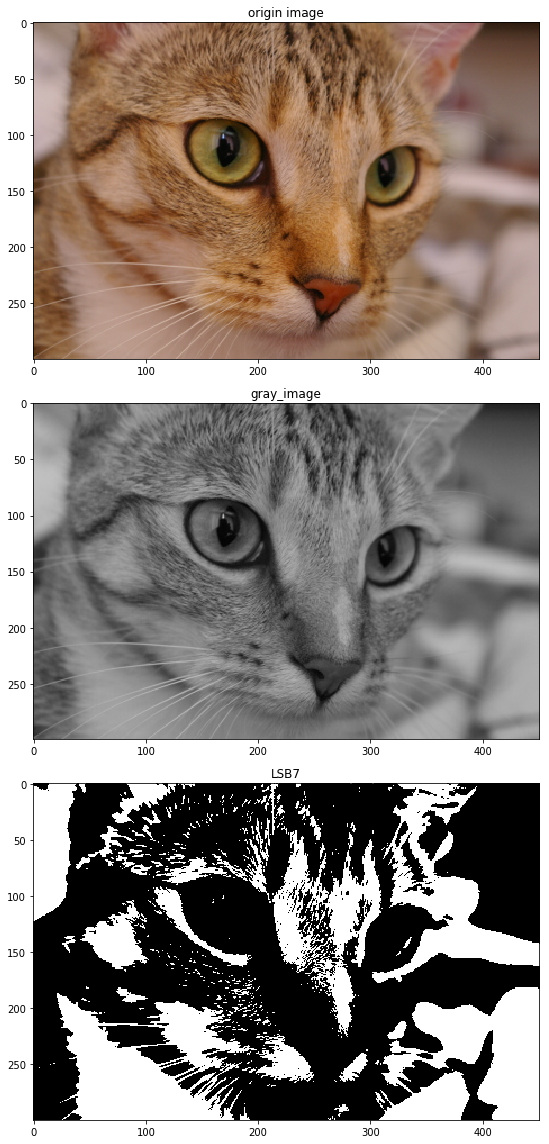

In [11]:
from skimage import io,data,img_as_ubyte
import matplotlib.pyplot as plt
import numpy as np

def lsb(x):
    listL = []
    for i in range (0, 8):
        listL.append(x % (2 **(i+1)))
        
    for j in range (7,0,-1):
        listL[j] = listL[j] - listL[j-1]
        if listL[j] != 0:
            if(listL[j] % 2) == 0:
                listL[j] = 1
        else:
            listL[j] = 0
    
    return listL

img=data.chelsea()
rows,cols,dims = img.shape
plt.figure(figsize = (16,16))

img_gray = img_as_ubyte(img.copy())
img_sample = img[:,:,0].copy()


for i in range (0,rows):
    for j in  range(0,cols):
        sum = 0.0
        for  k in range(0,3):
            sum = sum +img[i,j,k]
        img_gray[i,j] = sum/3
        
        img_sample[i,j] = sum/3
        
        listL = lsb(img_sample[i,j])
        
        if listL[7] == 1:
            img_sample[i,j] = 255
        else:
            img_sample[i,j] = 0
plt.subplot(3,1,1)
plt.title('origin image')
plt.imshow(img)

plt.subplot(3,1,2)
plt.title('gray_image')
plt.imshow(img_gray)

plt.subplot(3,1,3)
plt.title('LSB7')
io.imshow(img_sample)
plt.show()

In [12]:
import math

def dis (color1,color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow(color1[i]-color2[i],2)
    print(math.sqrt(dif))

black = [0,0,0]
rad = [255,0,0]
green = [0,255,0]
blue = [0,0,255]
pink = [255 ,175,175]
white = [255,255,255]

dis(black,white)
dis(white,pink)
dis(black,pink)

441.6729559300637
113.13708498984761
355.3519382246282


D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


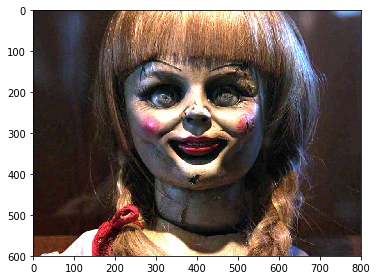

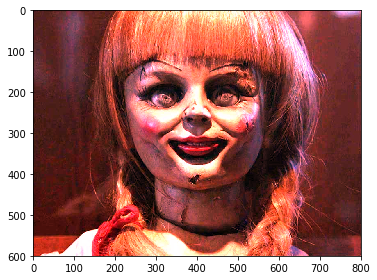

In [14]:
from skimage import io,data
import matplotlib.pyplot as plt

img = io.imread('8.jpg')
io.imshow(img)

rows,cols,dims = img.shape
img2 = img.copy()

for i in range(0,rows):
    for j in range(0,cols):
        newB = 2* img2[i,j,0]
        if newB>255:
            newB = 255
        img2[i,j,0]  = newB

plt.figure()
io.imshow(img2)
io.show()

D:\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
D:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


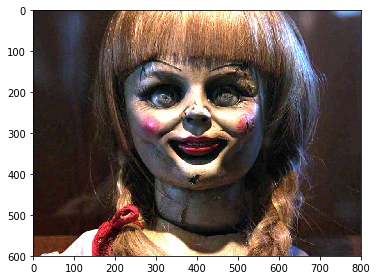

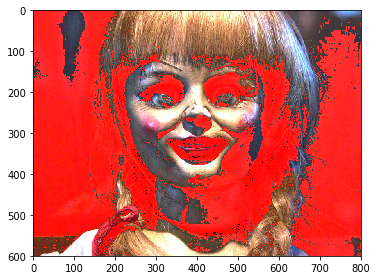

In [16]:
from skimage import io
import matplotlib.pyplot as plt
import math

def dis (color1,color2):
    dif = 0
    for i in range(0,3):
        dif = dif + math.pow(color1[i]-color2[i],2)
    return math.sqrt(dif)

def makeC(image,brown):
    rows,cols,dims = image.shape
    for i in   range(0,rows):
        for j in range(0,cols):
            if dis(image[i,j],brown)<50.0:
                image[i,j,0] = 255
    return image

img= io.imread('8.jpg')
io.imshow(img)

brown = [45,25,15]
img2 = makeC(img,brown)
plt.figure()
io.imshow(img2)
io.show()